In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## A-grid (initial condition spike at h)

In [2]:
nx = 61 # number of points from x = 0 to x = 1
dx = 1/nx

nt = 50
dt = 1/nt

x = np.linspace(0,1,nx)

midpoint = math.floor(math.floor(len(x)/2)/2)*2

initialu = np.zeros(len(x)).astype(float)
initialh = np.where(x == x[midpoint], 1, 0).astype(float)

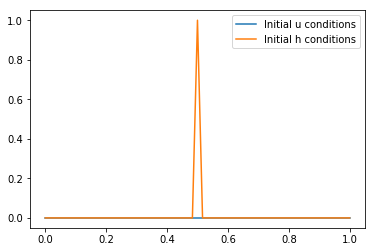

In [3]:
plt.clf()
plt.ion()
plt.plot(x, initialu, label = 'Initial u conditions')
plt.plot(x, initialh, label = 'Initial h conditions')
plt.legend(loc = 'best')
plt.show()

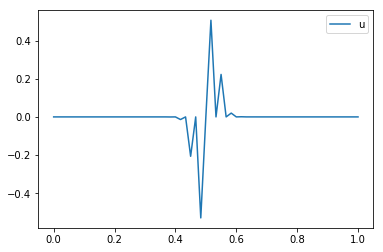

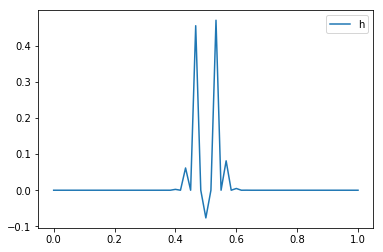

In [6]:
uOld = initialu.copy()
hOld = initialh.copy()
u = np.zeros_like(uOld)
h = np.zeros_like(hOld)

g = 1 # gravitational acceleration constant
H = 1 # height

c = 0.1 # courant number root(g*H)(dt/dx)

dt = 1/nt

for it in range(int(nt/2)): 
    for y in range(1, nx-2):
        u[y] = uOld[y] - (c/(2*H))*(hOld[y+1] - hOld[y-1]) # forward in time and centred in space
        h[y] = hOld[y] - (c/(2*g))*(u[y+1] - u[y-1]) # backward in time and centred in space
    
    u[0] = uOld[0] - (c/(2*H))*(hOld[1] - hOld[nx-2])
    u[nx-1] = uOld[nx-1] - (c/(2*H))*(hOld[1] - hOld[nx - 2])
    h[0] = hOld[0] - (c/(2*g))*(u[1] - u[nx- 2])
    h[nx-1] = hOld[nx-1] - (c/(2*g))*(u[1] - u[nx- 2])
    
    hOld = h.copy()
    uOld = u.copy()

plt.ion()
#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, u, label = 'u')
plt.legend(loc = 'best')
plt.show()

#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, h, label = 'h')
plt.legend(loc = 'best')
plt.show()



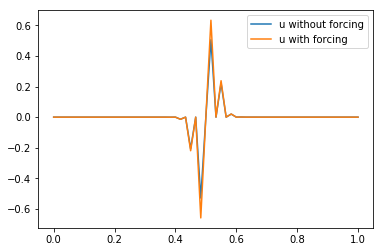

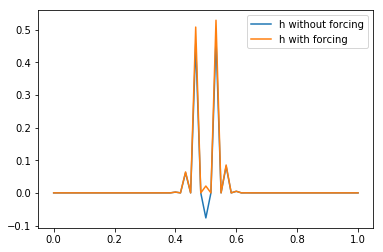

In [7]:

uOld_forcing = initialu.copy()
hOld_forcing = initialh.copy()
u_forcing = np.zeros_like(uOld_forcing)
h_forcing = np.zeros_like(hOld_forcing)

g = 1 # gravitational acceleration constant
H = 1 # height

c = 0.1 # courant number root(g*H)(dt/dx)
w = 8


for it in range(int(nt/2)):   # because looking at t = 0.5
    for y in range(1, nx-2):
        u_forcing[y] = uOld_forcing[y] - (c/(2*H))*(hOld_forcing[y+1] - hOld_forcing[y-1]) # forward in time and centred in space
        if y == midpoint:
            h_forcing[y] = hOld_forcing[y] - (c/(2*g))*(u_forcing[y+1] - u_forcing[y-1]) + dt*math.sqrt(g*H)*math.sin(w*it/nt)# backward in time and centred in space
        else:
            h_forcing[y] = float(hOld_forcing[y] - (c/(2*g))*(u_forcing[y+1] - u_forcing[y-1]))

    # assuming periodic boundary conditions can define u and h on the boundaries
    u_forcing[0] = uOld_forcing[0] - (c/(2*H))*(hOld_forcing[1] - hOld_forcing[nx-2])
    u_forcing[nx-1] = uOld_forcing[nx-1] - (c/(2*H))*(hOld_forcing[1] - hOld_forcing[nx - 2])
    h_forcing[0] = hOld_forcing[0] - (c/(2*g))*(u_forcing[1] - u_forcing[nx- 2])
    h_forcing[nx-1] = hOld_forcing[nx-1] - (c/(2*g))*(u_forcing[1] - u_forcing[nx- 2])
    
    hOld_forcing = h_forcing.copy()
    uOld_forcing = u_forcing.copy()

plt.ion()
#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, u, label = 'u without forcing')
plt.plot(x, u_forcing, label = 'u with forcing')
plt.legend(loc = 'best')
plt.show()

#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, h, label = 'h without forcing')
plt.plot(x, h_forcing, label = 'h with forcing')
plt.legend(loc = 'best')
plt.show()

# without forcing get negative h 

In [8]:
dt

0.02

## C-grid

In [ ]:
nx = 61 # number of points from x = 0 to x = 1
nt = 50

x = np.linspace(0,1,nx)
midpoint = math.floor(math.floor(len(x)/2)/2)*2
initialu = np.zeros(len(x)).astype(float)
initialh = np.where(x == x[midpoint], 1, 0).astype(float)

In [ ]:
plt.clf()
plt.ion()
plt.plot(x, initialu, label = 'Initial u conditions')
plt.plot(x, initialh, label = 'Initial h conditions')
plt.legend(loc = 'best')
plt.show()

In [ ]:
u_cgrid = initialu.copy()
h_cgrid = initialh.copy()


uhalf = np.zeros(len(u_cgrid) -2)
# for a c-grid the velocity u is stagerred in the x-direction by half
for i in range(0, len(u_cgrid)-2):
    uhalf[i] = (u_cgrid[i] + u_cgrid[i + 1])/2
    
uOld = uhalf.copy()
hOld = initialh.copy()

g = 1 # gravitational acceleration constant
H = 1 # height
w = 8

c = 0.1 # courant number root(g*H)(dt/dx)
dt = 1/nt # assuming considering the problem from t=0s to t=1s


for it in range(nt): 
    for y in range(nx-3):
        uhalf[y] = uOld[y] - (c/(2*H))*(hOld[y + 1] - hOld[y]) # forward in time and centred in space
        
        if y == midpoint:
            h_cgrid[y] = hOld[y] - (c/(2*g))*(uhalf[y + 1] - uhalf[y-1]) #+ dt*math.sqrt(g*H)*math.sin(w*it/(2*nt))# backward in time and centred in space
        else:
            h_cgrid[y] = hOld[y] - (c/(2*g))*(uhalf[y + 1] - uhalf[y-1])
        
    hOld = h_cgrid.copy()
    uOld = uhalf.copy()

plt.ion()
#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x[1:(len(x) -1)], uhalf, label = 'u with C-grid and no forcing')
plt.legend(loc = 'best')
plt.show()

#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, h_cgrid, label = 'h with C-grid and no forcing')
plt.legend(loc = 'best')
plt.show()

In [ ]:
u_cgrid_forcing = initialu.copy()
h_cgrid_forcing = initialh.copy()


uhalf_forcing = np.zeros(len(u_cgrid_forcing) -2)
for i in range(0, len(u_cgrid_forcing)-2):
    uhalf_forcing[i] = (u_cgrid_forcing[i] + u_cgrid_forcing[i + 1])/2
    
uOld = uhalf_forcing.copy()
hOld = initialh.copy()

g = 1 # gravitational acceleration constant
H = 1 # height
w = 8

c = 0.1 # courant number root(g*H)(dt/dx)
dt = 1/nt # assuming considering the problem from t=0s to t=1s


for it in range(nt): 
    for y in range(nx-3):
        uhalf_forcing[y] = uOld[y] - (c/(2*H))*(hOld[y + 1] - hOld[y]) # forward in time and centred in space
        
        if y == midpoint:
            h_cgrid_forcing[y] = hOld[y] - (c/(2*g))*(uhalf_forcing[y + 1] - uhalf_forcing[y-1]) + dt*math.sqrt(g*H)*math.sin(w*it/(2*nt))# backward in time and centred in space
        else:
            h_cgrid_forcing[y] = hOld[y] - (c/(2*g))*(uhalf_forcing[y + 1] - uhalf_forcing[y-1])
        
    hOld = h_cgrid_forcing.copy()
    uOld = uhalf_forcing.copy()

plt.ion()
#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x[1:(len(x) -1)], uhalf, label = 'u with C-grid and no forcing')
plt.plot(x[1:(len(x) -1)], uhalf_forcing, label = 'u with C-grid and forcing')
plt.legend(loc = 'best')
plt.show()

#plt.plot(x, initialu, 'b--', label = 'Initial u conditions')
#plt.plot(x, initialh, 'r--', label = 'Initial h conditions')
plt.plot(x, h_cgrid, label = 'h with C-grid and no forcing')
plt.plot(x, h_cgrid_forcing, label = 'h with C-grid and forcing')
plt.legend(loc = 'best')
plt.show()